# Givens transformation

### References

* Lawson, C. L,. and Hanson, R. J. (1995). Solving least squares problems. SIAM, ISBN 0-89871-356-0

* Golub, G. H. and C. F. Van Loan, (2013), Matrix computations, 4th edition, Johns Hopkins University Press, ISBN 978-1-4214-0794-4.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matcomp import algorithms as mca
#np.set_printoptions(precision=3)
np.set_printoptions(suppress=True)

### Definition

A *Givens trasformation* $\mathbf{G}(i, k, \theta)$ is an $M \times M$ orthogonal matrix given by:

### Create synthetic data

In [2]:
np.random.seed(6)
M = 13

In [3]:
x = np.random.rand(M)

In [4]:
i = 2
k = 5
c, s = mca.Givens_rotation(x[i], x[k])

In [5]:
G = np.identity(M)
G[i,i] = c
G[i,k] = s
G[k,i] = -s
G[k,k] = c

In [6]:
np.allclose(np.dot(G.T,G), np.dot(G,G.T))

True

In [7]:
np.allclose(np.identity(M), np.dot(G,G.T))

True

In [8]:
GTx = np.dot(G.T, x)

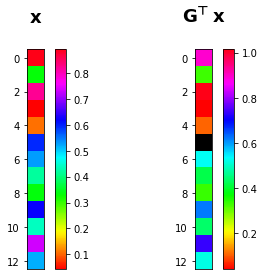

In [9]:
cmap = plt.cm.hsv.copy()
cmap.set_bad(color='black')

plt.figure(figsize=(6,4))

plt.subplot(121)
plt.title('$\mathbf{x}$\n', fontsize=18)
plt.matshow(np.reshape(x, (M,1)), fignum=0, cmap="hsv")
plt.colorbar()
plt.xticks([])

plt.subplot(122)
plt.title('$\mathbf{G^{\\top} \, x}$\n', fontsize=18)
GTx_masked = np.ma.masked_where(GTx < 1e-15, GTx)
plt.matshow(np.reshape(GTx_masked, (M,1)), fignum=0, cmap=cmap)
plt.colorbar()
plt.xticks([])

plt.tight_layout()
plt.show()